<a href="https://colab.research.google.com/github/Avisek183/Pneumonia-Detection-using-CNN/blob/main/Pneumonia_FineTuned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras-tuner

     |████████████████████████████████| 61kB 1.7MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=1d201fbc97eb1c9acce28db26c3c7921f5610fcae5daf96058097e45bbad2c99
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=a9d830bc6cbdffe6ed509f733ea4c43bf2af5a4f72cd4ba05ef29e9dcd127dbe
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
print(tf.__version__)

2.3.0


In [ ]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_recall_curve, roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('fivethirtyeight')
import pickle 
import os 
import numpy as np
import cv2 
%matplotlib inline
import pandas.util.testing as tm

In [ ]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 200
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)


In [ ]:
!unzip -uq "/content/drive/My Drive/chest_xray.zip" -d "/content/drive/My Drive/chest_xray.zip"

checkdir:  cannot create extraction directory: /content/drive/My Drive/chest_xray.zip
           File exists


Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0448-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0449-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0450-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0451-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0452-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0453-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0453-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0455-0001.jpeg  
  inflating: chest_xray/train/NO

In [ ]:
import os
!ls
!ls chest_xray/test/NORMAL/
os.listdir()


chest_xray  drive  sample_data
IM-0001-0001.jpeg	   NORMAL2-IM-0173-0001-0001.jpeg
IM-0003-0001.jpeg	   NORMAL2-IM-0173-0001-0002.jpeg
IM-0005-0001.jpeg	   NORMAL2-IM-0195-0001.jpeg
IM-0006-0001.jpeg	   NORMAL2-IM-0196-0001.jpeg
IM-0007-0001.jpeg	   NORMAL2-IM-0198-0001.jpeg
IM-0009-0001.jpeg	   NORMAL2-IM-0199-0001.jpeg
IM-0010-0001.jpeg	   NORMAL2-IM-0201-0001.jpeg
IM-0011-0001-0001.jpeg	   NORMAL2-IM-0206-0001.jpeg
IM-0011-0001-0002.jpeg	   NORMAL2-IM-0207-0001.jpeg
IM-0011-0001.jpeg	   NORMAL2-IM-0210-0001.jpeg
IM-0013-0001.jpeg	   NORMAL2-IM-0213-0001.jpeg
IM-0015-0001.jpeg	   NORMAL2-IM-0217-0001.jpeg
IM-0016-0001.jpeg	   NORMAL2-IM-0219-0001.jpeg
IM-0017-0001.jpeg	   NORMAL2-IM-0221-0001.jpeg
IM-0019-0001.jpeg	   NORMAL2-IM-0222-0001.jpeg
IM-0021-0001.jpeg	   NORMAL2-IM-0229-0001.jpeg
IM-0022-0001.jpeg	   NORMAL2-IM-0232-0001.jpeg
IM-0023-0001.jpeg	   NORMAL2-IM-0233-0001.jpeg
IM-0025-0001.jpeg	   NORMAL2-IM-0237-0001.jpeg
IM-0027-0001.jpeg	   NORMAL2-IM-0238-0001.jpeg
IM-0028-0

['.config', 'drive', 'chest_xray', 'sample_data']

In [ ]:
train = get_training_data('chest_xray/train')
test = get_training_data('chest_xray/test')


OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [ ]:
pnenumonia = 0 
normal = 0 

for i, j in train:
    if j == 0:
        pnenumonia+=1
    else:
        normal+=1
        
print('Pneumonia:', pnenumonia)
print('Normal:', normal)
print('Pneumonia - Normal:', pnenumonia-normal)

Pneumonia: 3888
Normal: 1349
Pneumonia - Normal: 2539


PNEUMONIA


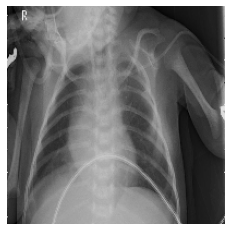

In [ ]:
plt.imshow(train[1][0], cmap='gray')
plt.axis('off')
print(labels[train[1][1]])

In [ ]:
X = []
y = []

for feature, label in train:
    X.append(feature)
    y.append(label)

for feature, label in test:
    X.append(feature)
    y.append(label)
    
#for feature, label in val:
#    X.append(feature)
#    y.append(label)


# resize data for deep learning 
X = np.array(X).reshape(-1, img_size, img_size, 1)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=32)

In [ ]:
X_train = X_train / 255
X_test = X_test / 255
X_val = X_val / 255


In [ ]:
# good for balancing out disproportions in the dataset 
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=90, 
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=True,  
        vertical_flip=True)  

datagen.fit(X_train)


In [ ]:
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=1))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=1))

model.add(Conv2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=1))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

early_stop = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)
adam = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['acc'])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 256)     2560      
_________________________________________________________________
activation (Activation)      (None, 200, 200, 256)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 256)     0         
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 256)     400       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      147520    
_________________________________________________________________
activation_1 (Activation)    (None, 100, 100, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)       

In [ ]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=40), validation_data=(X_val, y_val), epochs=10)

Epoch 1/10
94/94 [==============================] - 24s 251ms/step - loss: 0.2591 - acc: 0.9005 - val_loss: 0.2025 - val_acc: 0.9222
Epoch 2/10
94/94 [==============================] - 24s 250ms/step - loss: 0.2440 - acc: 0.9061 - val_loss: 0.1963 - val_acc: 0.9307
Epoch 3/10
94/94 [==============================] - 24s 251ms/step - loss: 0.2369 - acc: 0.9072 - val_loss: 0.1968 - val_acc: 0.9211
Epoch 4/10
94/94 [==============================] - 24s 250ms/step - loss: 0.2381 - acc: 0.9061 - val_loss: 0.2041 - val_acc: 0.9243
Epoch 5/10
94/94 [==============================] - 24s 251ms/step - loss: 0.2410 - acc: 0.9053 - val_loss: 0.2375 - val_acc: 0.9041
Epoch 6/10
94/94 [==============================] - 24s 250ms/step - loss: 0.2314 - acc: 0.9072 - val_loss: 0.2348 - val_acc: 0.9072
Epoch 7/10
94/94 [==============================] - 24s 251ms/step - loss: 0.2368 - acc: 0.9061 - val_loss: 0.3613 - val_acc: 0.8369
Epoch 8/10
94/94 [==============================] - 23s 250ms/step - 

In [ ]:
model.evaluate(X_test, y_test)

37/37 [==============================] - 2s 67ms/step - loss: 0.1759 - acc: 0.9301


[0.17590855062007904, 0.9300937652587891]